<a href="https://colab.research.google.com/github/augustiner-nyc/SUPERVISED-MACHINE-LEARNING/blob/main/Random_Forest_(R%2BPython).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a Random Forest model using R

In [ ]:
%load_ext rpy2.ipython

In [ ]:
#load library
%%R
suppressMessages(install.packages("caret"))
suppressMessages(install.packages("AppliedPredictiveModeling"))

R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpQMBkH7/downloaded_packages’
R[write to console]: 
R[write to console]: 



In [ ]:
%%R
data("iris")
iris = iris
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: lattice



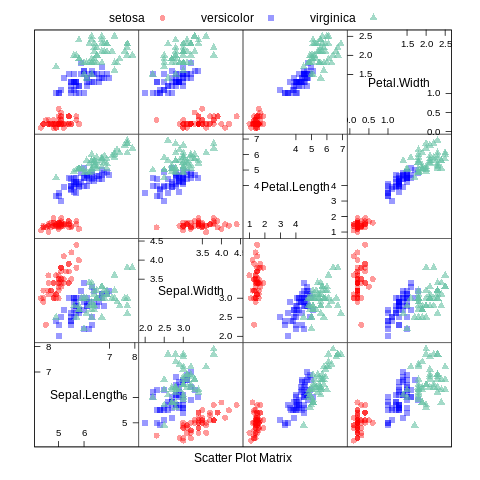

In [ ]:
#Visualize the data: Scatterplot
%%R
library("caret")
library(AppliedPredictiveModeling)
transparentTheme(trans = .4)
featurePlot(x = iris[, 1:4],
            y = iris$Species,
            plot = "pairs",
            auto.key = list(columns = 3))

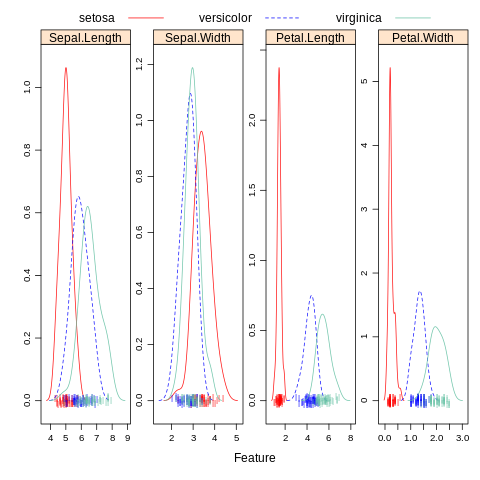

In [ ]:
#Visualize the data: Overlayed Density Plots
%%R
transparentTheme(trans = .9)
featurePlot(x = iris[, 1:4],
            y = iris$Species,
            plot = "density",
            scales = list(x = list(relation="free"),
                          y = list(relation="free")),
            adjust = 1.5,
            pch = "|",
            layout = c(4,1),
            auto.key = list(columns = 3))

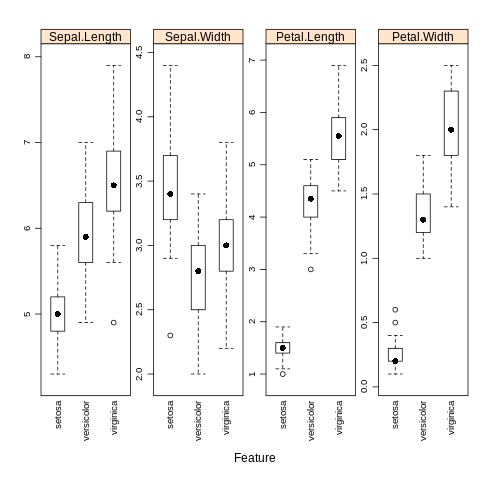

In [ ]:
#Visualize the data: Box Plots
%%R
featurePlot(x = iris[, 1:4],
            y = iris$Species,
            plot = "box",
            scales = list(y = list(relation="free"),
                          x = list(rot = 90)),
            layout = c(4,1),
            auto.key = list(columns = 2))

In [ ]:
#Split the data
%%R
index = createDataPartition(iris[,1], p = .80, list = FALSE)
dim(index)
#Training
training = iris[index,]
dim(training)
#Test
valid = iris[-index,]
dim(valid)

[1] 29  5


In [ ]:
#Create Test Harnesses
%%R
control = trainControl(method="cv", number=10)
metric = "Accuracy"

In [ ]:
#Build a Random Forest model using rf
%%R
set.seed(7)
fit.rf = train(Species~., data = training, method = "rf", metric = metric, trControl = control)
fit.rf

Random Forest 

121 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 109, 109, 108, 109, 109, 109, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa   
  2     0.9346154  0.902193
  3     0.9346154  0.902193
  4     0.9262821  0.889693

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


In [ ]:
%%R
summary(fit.rf$finalModel)

                Length Class      Mode     
call               4   -none-     call     
type               1   -none-     character
predicted        121   factor     numeric  
err.rate        2000   -none-     numeric  
confusion         12   -none-     numeric  
votes            363   matrix     numeric  
oob.times        121   -none-     numeric  
classes            3   -none-     character
importance         4   -none-     numeric  
importanceSD       0   -none-     NULL     
localImportance    0   -none-     NULL     
proximity          0   -none-     NULL     
ntree              1   -none-     numeric  
mtry               1   -none-     numeric  
forest            14   -none-     list     
y                121   factor     numeric  
test               0   -none-     NULL     
inbag              0   -none-     NULL     
xNames             4   -none-     character
problemType        1   -none-     character
tuneValue          1   data.frame list     
obsLevels          3   -none-   

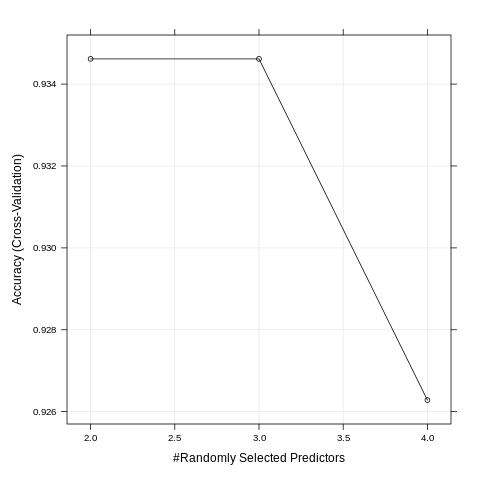

In [ ]:
%%R
plot(fit.rf)

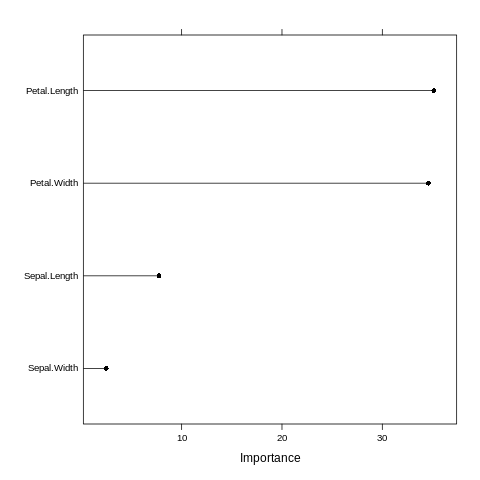

In [ ]:
#Plot the variable Importance
%%R
vi = varImp(fit.rf, scale = FALSE)
plot(vi, top = ncol(training)-1)

In [ ]:
#Create Prediction using Trained Random Forest
%%R
data.pred = predict(fit.rf, newdata = valid)
table(data.pred, valid$Species)

            
data.pred    setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0         9


In [ ]:
#Check Error Rate
%%R
error.rate = round(mean(data.pred != valid$Species,2))
error.rate

[1] 0


In [ ]:
#Confusion Matrix
%%R
cm = confusionMatrix(as.factor(data.pred), reference = as.factor(valid$Species), mode = "prec_recall")
print(cm)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0         9

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8806, 1)
    No Information Rate : 0.3448     
    P-Value [Acc > NIR] : 3.895e-14  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Precision                   1.0000            1.0000           1.0000
Recall                      1.0000            1.0000           1.0000
F1                          1.0000            1.0000           1.0000
Prevalence                  0.3448            0.3448           0.3103
Detection Rate              0.3448            

In [ ]:
#Build a Random Forest Model using extra Trees
%%R
set.seed(7)
fit.extraTrees = train(Species~., data = training, method = "rf", metric = metric, trControl=control)
fit.extraTrees

Random Forest 

121 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 109, 109, 108, 109, 109, 109, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa   
  2     0.9346154  0.902193
  3     0.9346154  0.902193
  4     0.9262821  0.889693

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


In [ ]:
#Total Summary
%%R
summary(fit.extraTrees$finalModel)

                Length Class      Mode     
call               4   -none-     call     
type               1   -none-     character
predicted        121   factor     numeric  
err.rate        2000   -none-     numeric  
confusion         12   -none-     numeric  
votes            363   matrix     numeric  
oob.times        121   -none-     numeric  
classes            3   -none-     character
importance         4   -none-     numeric  
importanceSD       0   -none-     NULL     
localImportance    0   -none-     NULL     
proximity          0   -none-     NULL     
ntree              1   -none-     numeric  
mtry               1   -none-     numeric  
forest            14   -none-     list     
y                121   factor     numeric  
test               0   -none-     NULL     
inbag              0   -none-     NULL     
xNames             4   -none-     character
problemType        1   -none-     character
tuneValue          1   data.frame list     
obsLevels          3   -none-   

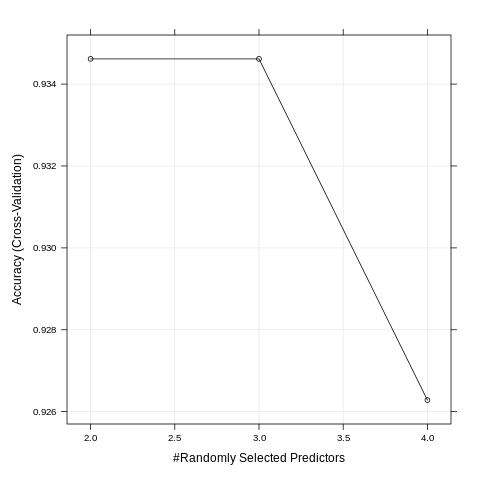

In [ ]:
%%R
plot(fit.extraTrees)

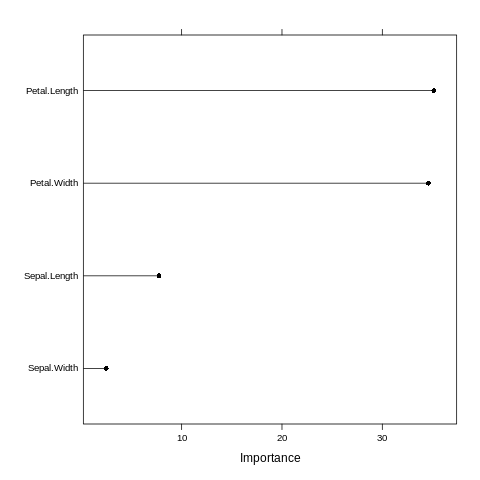

In [ ]:
#Plot the variable Importance
%%R
vi = varImp(fit.extraTrees, scale = FALSE)
plot(vi, top = ncol(training)-1)

In [ ]:
#Create Prediction using Trained Random Forest
%%R
data.pred = predict(fit.extraTrees, newdata = valid)
table(data.pred, valid$Species)

            
data.pred    setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0         9


In [ ]:
#Check Error
%%R
error.rate = round(mean(data.pred != valid$Species,2))
error.rate

[1] 0


In [ ]:
#Confusion Matrix
%%R
cm = confusionMatrix(as.factor(data.pred), reference = as.factor(valid$Species), mode = "prec_recall")
print(cm)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0         9

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8806, 1)
    No Information Rate : 0.3448     
    P-Value [Acc > NIR] : 3.895e-14  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Precision                   1.0000            1.0000           1.0000
Recall                      1.0000            1.0000           1.0000
F1                          1.0000            1.0000           1.0000
Prevalence                  0.3448            0.3448           0.3103
Detection Rate              0.3448            

In [ ]:
#Compare Random Forest Models
%%R
results = resamples(list(rf=fit.rf, extraTrees = fit.extraTrees))
summary(results)


Call:
summary.resamples(object = results)

Models: rf, extraTrees 
Number of resamples: 10 

Accuracy 
                Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
rf         0.8333333 0.8637821 0.9583333 0.9346154       1    1    0
extraTrees 0.8333333 0.8637821 0.9583333 0.9346154       1    1    0

Kappa 
           Min.   1st Qu. Median     Mean 3rd Qu. Max. NA's
rf         0.75 0.7976974 0.9375 0.902193       1    1    0
extraTrees 0.75 0.7976974 0.9375 0.902193       1    1    0



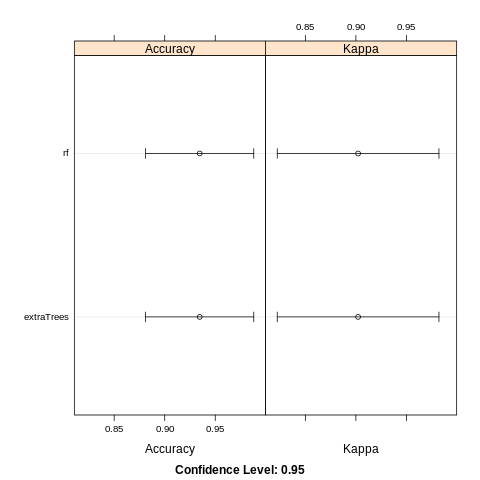

In [ ]:
#Visualize Results
%%R
dotplot(results)

# Random Forest in Python

In [1]:
#Using sklearn
import sklearn
import numpy as np
import pandas as pd

In [2]:
# Load the Data
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [6]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
#Train the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
#Test the model
from sklearn.metrics import confusion_matrix

#Results:
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [11]:
#Check Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)*100

97.36842105263158

In [13]:
#Check Important Features
clf.feature_importances_

array([0.08017804, 0.03248182, 0.53607738, 0.35126276])